In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import Citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call. ** City Name goes after q= **
url = 'http://api.openweathermap.org/data/2.5/weather?'

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") + "&appid=" + weather_api_key
  
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | meulaboh
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | burnie
Processing Record 8 of Set 1 | erdenet
Processing Record 9 of Set 1 | touros
Processing Record 10 of Set 1 | gaildorf
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | eilenburg
Processing Record 15 of Set 1 | lesnoy
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | concarneau
Processing Record 19 of Set 1 | altay
Processing Record 20 of Set 1 | witu
Processing Record 21 of Set 1 | fairbanks
Processing Record 22

Processing Record 39 of Set 4 | khatanga
Processing Record 40 of Set 4 | zhongshan
Processing Record 41 of Set 4 | guerrero negro
Processing Record 42 of Set 4 | saskylakh
Processing Record 43 of Set 4 | codrington
Processing Record 44 of Set 4 | new norfolk
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | souillac
Processing Record 47 of Set 4 | saint-georges
Processing Record 48 of Set 4 | tottori
Processing Record 49 of Set 4 | chuy
Processing Record 50 of Set 4 | saint-joseph
Processing Record 1 of Set 5 | morristown
Processing Record 2 of Set 5 | havelock
Processing Record 3 of Set 5 | lokosovo
Processing Record 4 of Set 5 | ofunato
Processing Record 5 of Set 5 | san jose del guaviare
Processing Record 6 of Set 5 | along
Processing Record 7 of Set 5 | neuquen
Processing Record 8 of Set 5 | mehran
Processing Record 9 of Set 5 | upata
Processing Record 10 of Set 5 | pangnirtung
Processing Record 11 of Set 5 | bikin
Processing Record 12 of Set 5 | svetlog

Processing Record 29 of Set 8 | orchard homes
Processing Record 30 of Set 8 | kargasok
Processing Record 31 of Set 8 | luanda
Processing Record 32 of Set 8 | jieshi
Processing Record 33 of Set 8 | fenoarivo
Processing Record 34 of Set 8 | devils lake
Processing Record 35 of Set 8 | westport
Processing Record 36 of Set 8 | antigonish
Processing Record 37 of Set 8 | kasamwa
Processing Record 38 of Set 8 | anito
Processing Record 39 of Set 8 | ixtapa
Processing Record 40 of Set 8 | phun phin
City not found. Skipping...
Processing Record 41 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 42 of Set 8 | anadyr
Processing Record 43 of Set 8 | kieta
Processing Record 44 of Set 8 | leshukonskoye
Processing Record 45 of Set 8 | akyab
Processing Record 46 of Set 8 | brufut
Processing Record 47 of Set 8 | jumla
Processing Record 48 of Set 8 | hirado
Processing Record 49 of Set 8 | kushima
Processing Record 50 of Set 8 | naze
Processing Record 1 of Set 9 | rock springs
Processi

Processing Record 15 of Set 12 | villarrica
Processing Record 16 of Set 12 | hervey bay
Processing Record 17 of Set 12 | taunggyi
Processing Record 18 of Set 12 | tecoanapa
Processing Record 19 of Set 12 | togur
Processing Record 20 of Set 12 | san quintin
Processing Record 21 of Set 12 | khudumelapye
Processing Record 22 of Set 12 | north myrtle beach
Processing Record 23 of Set 12 | springdale
Processing Record 24 of Set 12 | marysville
Processing Record 25 of Set 12 | padang
Processing Record 26 of Set 12 | soledade
Processing Record 27 of Set 12 | buraydah
Processing Record 28 of Set 12 | sorvag
City not found. Skipping...
Processing Record 29 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 30 of Set 12 | oranjemund
Processing Record 31 of Set 12 | northam
Processing Record 32 of Set 12 | majene
Processing Record 33 of Set 12 | smithers
Processing Record 34 of Set 12 | coulihaut
City not found. Skipping...
Processing Record 35 of Set 12 | yuksekova
Processing Reco

In [12]:
len(city_data)

577

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Meulaboh,4.1363,96.1285,300.96,72,12,1.04,ID,2022-01-21 03:21:24
1,Faanui,-16.4833,-151.7500,300.84,75,100,7.66,PF,2022-01-21 03:21:24
2,Qaqortoq,60.7167,-46.0333,269.43,88,100,7.00,GL,2022-01-21 03:21:24
3,Avarua,-21.2078,-159.7750,299.18,94,75,7.72,CK,2022-01-21 03:21:25
4,Tasiilaq,65.6145,-37.6368,276.24,92,100,6.27,GL,2022-01-21 03:21:25
5,Burnie,-41.0667,145.9167,295.90,52,2,3.07,AU,2022-01-21 03:21:25
6,Erdenet,49.0333,104.0833,259.61,95,93,0.56,MN,2022-01-21 03:21:25
7,Touros,-5.1989,-35.4608,299.65,74,72,3.90,BR,2022-01-21 03:21:26
8,Gaildorf,49.0003,9.7695,273.50,90,75,2.24,DE,2022-01-21 03:21:26
9,Puerto Ayora,-0.7393,-90.3518,296.15,90,85,3.56,EC,2022-01-21 03:21:26


In [14]:
# Establish new column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign new column order to data frame
city_data_reordered = city_data_df[new_column_order]

city_data_reordered.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Meulaboh,ID,2022-01-21 03:21:24,4.1363,96.1285,300.96,72,12,1.04
1,Faanui,PF,2022-01-21 03:21:24,-16.4833,-151.7500,300.84,75,100,7.66
2,Qaqortoq,GL,2022-01-21 03:21:24,60.7167,-46.0333,269.43,88,100,7.00
3,Avarua,CK,2022-01-21 03:21:25,-21.2078,-159.7750,299.18,94,75,7.72
4,Tasiilaq,GL,2022-01-21 03:21:25,65.6145,-37.6368,276.24,92,100,6.27


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

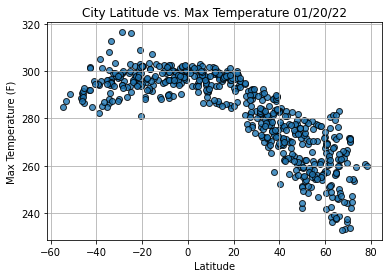

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

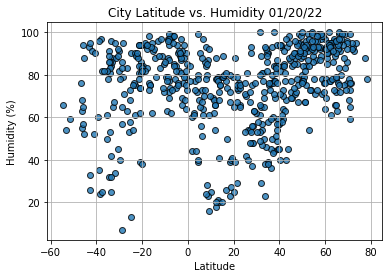

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

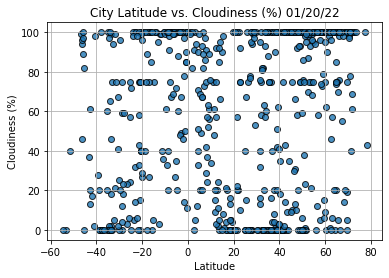

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

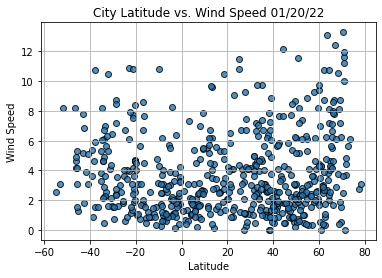

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()